In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

from foggy_statslib import core as fc
from foggy_statslib.stats.est import tsa as fsset
from foggy_statslib import fin as ff

# DATA

In [2]:
spx = (
    pd.read_csv("data/stooq_SPX_px.csv", index_col="Date", parse_dates=True)
    .sort_index()
    .rename_axis(index="date")
    ["Close"]
    .rename("SPX")
    # .pct_change()
)
spx.tail()

date
2022-10-31    3871.98
2022-11-01    3856.10
2022-11-02    3759.69
2022-11-03    3719.89
2022-11-04    3770.55
Name: SPX, dtype: float64

In [3]:
pput = (
    pd.read_csv("data/cboe_PPUT_px.csv", index_col="DATE", parse_dates=True)
    .sort_index()
    .rename_axis(index="date")
    ["PPUT"]
    # .pct_change()
)
pput.tail()

date
2022-10-28    1275.44
2022-10-31    1265.71
2022-11-01    1260.55
2022-11-02    1230.50
2022-11-03    1217.93
Name: PPUT, dtype: float64

# ANALYSIS

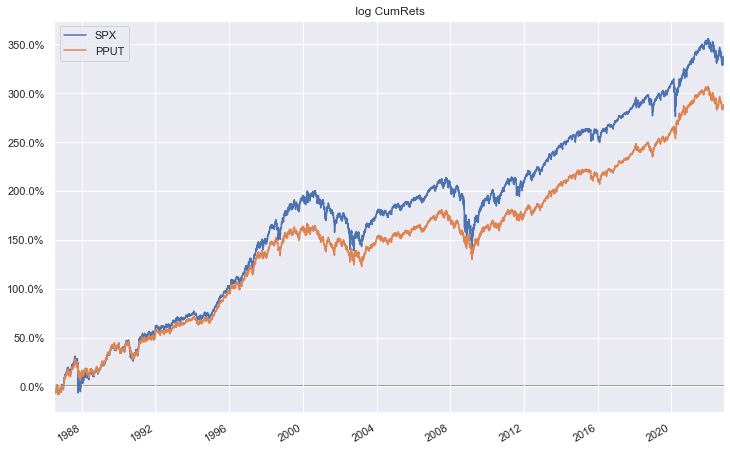

In [4]:
r = pd.DataFrame(
    {
       "SPX": spx,
        "PPUT": pput,
    }
).pct_change()
r = fc.get_common_subsample(r)

ff.plot_cum_r(r)
plt.show()

PPUT's smaller expected return is overwhelmed by its smaller volatility, giving it the Sharpe edge.

In [5]:
ff.get_est_perf_stats_of_r(r)

,Sharpe,t-stat,ER,Vol
SPX,0.532322,3.154080,0.095258,0.178948
PPUT,0.593008,3.513657,0.080829,0.136303


The alpha t-stat of PPUT over SPX is $1.57$, over this 35-year period.

## alpha

In [20]:
# i might need to do excess returns to replicate https://www.aqr.com/Insights/Research/White-Papers/Pathetic-Protection-The-Elusive-Benefits-of-Protective-Puts
fsset.linreg(df=r.loc[:"2016", :], y="PPUT", x=["SPX"], smoothing_horizon=21).summary()

/Users/sparshsah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PPUT   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     330.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.23e-72
Time:                        22:25:34   Log-Likelihood:                 45097.
No. Observations:                7672   AIC:                        -9.019e+04
Df Residuals:                    7670   BIC:                        -9.018e+04
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.302e-05   3.86e-05      0.855      0.392   -4.27e-05       0.000
SPX            0.7387      0.041     18.185      0.000       0.659       0.818
==============================================================================
Omnibus:                     6192.633   Durbin-Watson:                   0.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           348118.706
Skew:                           3.453   Prob(JB):                         0.00
Kurtosis:                      35.269   Cond. No.                         465.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 20 lags and without small sample correction
"""

In [21]:
ff.get_alpha_t_stat_of_r(r.loc[:"2016", :], smoothing_horizon=21)

/Users/sparshsah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/sparshsah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


of,SPX,PPUT
on,,
SPX,0.000000,0.855242
PPUT,0.429489,0.000000


In [9]:
ff.get_alpha_t_stat_of_r(r)

/Users/sparshsah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/sparshsah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


of,SPX,PPUT
on,,
SPX,0.000000,1.639147
PPUT,-0.046493,0.000000
